Input:  tensor([[ 1.0000,  8.0000, 12.0000, 18.0000, 21.0000,  0.1000,  1.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 0.3260,  4.4733,  6.8576, 11.6740, 14.2373,  3.7032,  1.0695,  1.0950,
          1.2300,  1.1483]])
Tank levels  tensor([[ 3.7992,  6.5297,  6.3371,  7.1865,  6.4999,  7.2972,  4.8254,  5.5353,
          4.5621,  5.2392, -0.7219]])
Total cost:  tensor(90.7071)
Time taken:  0.1171112060546875 seconds


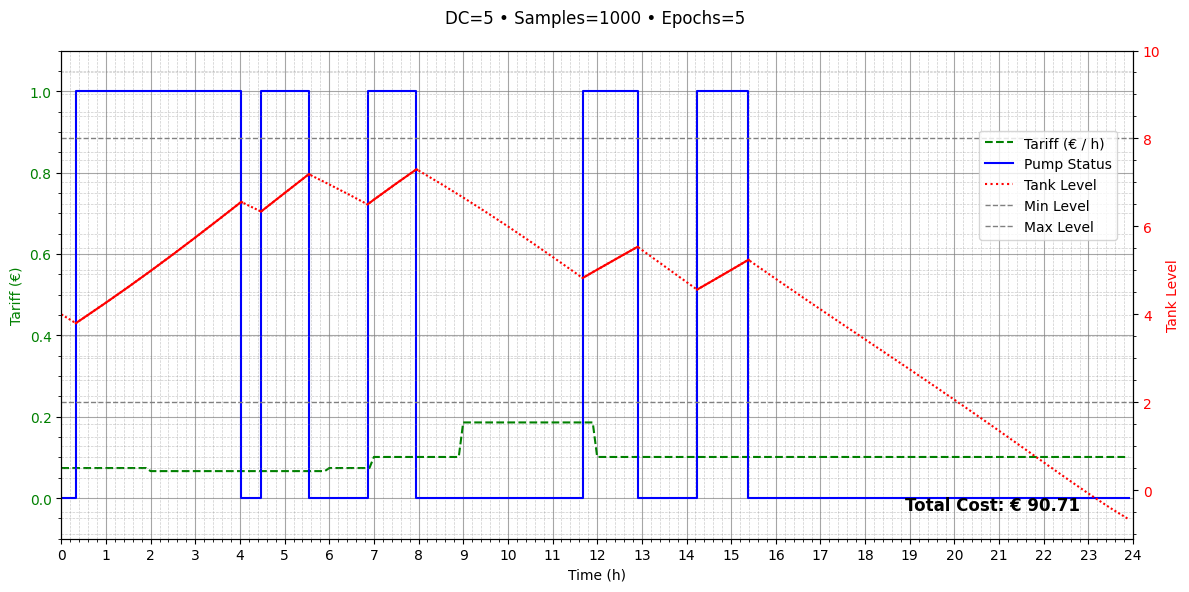

###########################################
Input:  tensor([[ 1.0000,  8.0000, 12.0000, 18.0000, 21.0000,  2.0000,  1.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 0.6198,  4.4497,  6.9885, 11.4630, 13.8289,  3.2663,  1.1124,  1.1542,
          1.0116,  1.3300]])
Tank levels  tensor([[ 3.6197,  6.0666,  5.7876,  6.6732,  5.9259,  6.7594,  4.5530,  5.1410,
          4.1507,  4.9313, -1.1911]])
Total cost:  tensor(90.0163)
Time taken:  0.0790555477142334 seconds


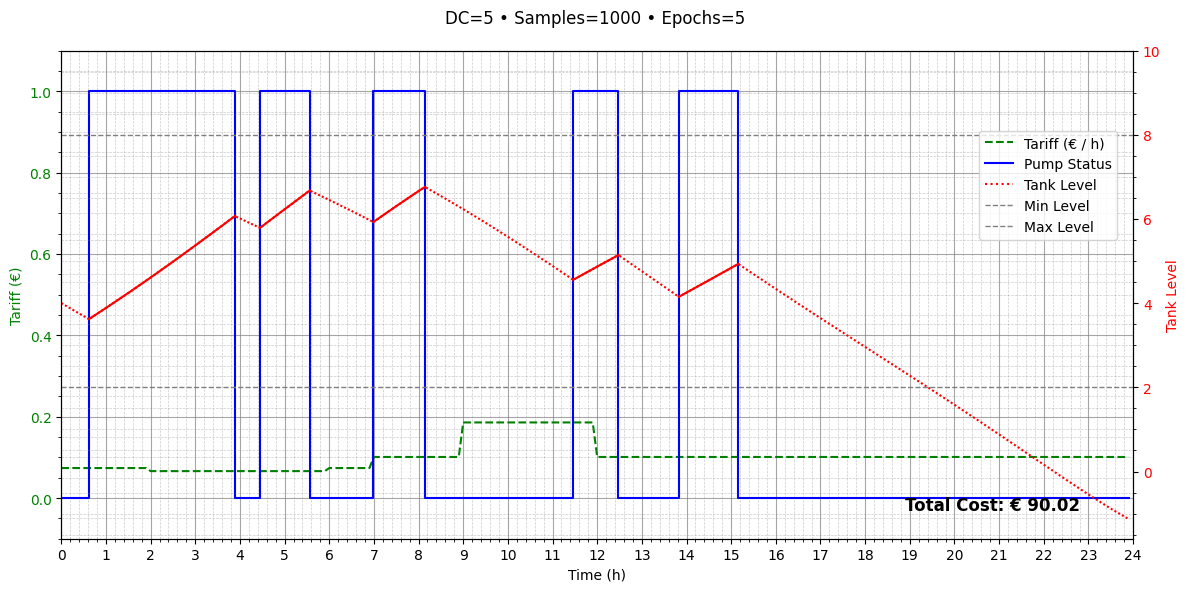

###########################################
Input:  tensor([[ 1.0000,  8.0000, 12.0000, 18.0000, 21.0000,  3.0000,  1.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[ 0.7961,  4.3641,  6.9134, 11.1112, 13.5584,  2.9861,  1.1406,  0.9657,
          0.9273,  1.2942]])
Tank levels  tensor([[ 3.5133,  5.7576,  5.4690,  6.3790,  5.6430,  6.3270,  4.2370,  4.7498,
          3.6718,  4.4293, -1.9122]])
Total cost:  tensor(87.1749)
Time taken:  0.07840824127197266 seconds


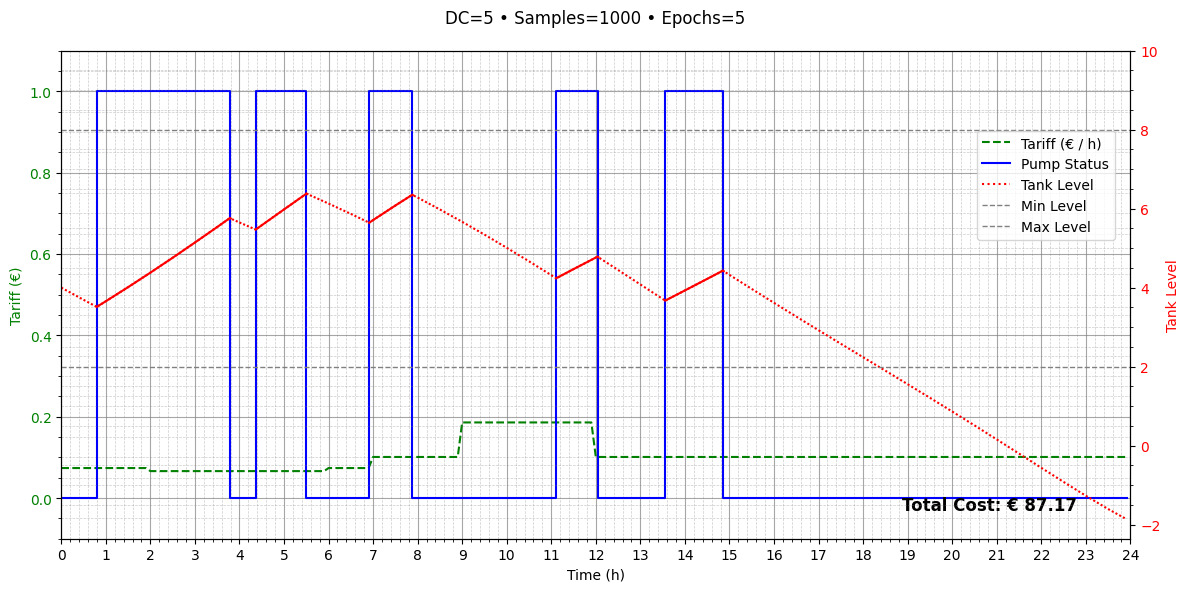

###########################################
Input:  tensor([[ 4.0000,  8.0000, 12.0000, 17.0000, 20.0000,  3.0000,  3.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[0.9907, 2.5092, 5.0052, 7.2241, 9.5110, 1.0977, 1.4082, 0.8088, 0.9998,
         0.9758]])
Tank levels  tensor([[ 3.3960,  4.1937,  3.9654,  5.0720,  4.5343,  5.1780,  4.4274,  5.1492,
          4.3398,  4.9538, -4.5411]])
Total cost:  tensor(65.5939)
Time taken:  0.0741567611694336 seconds


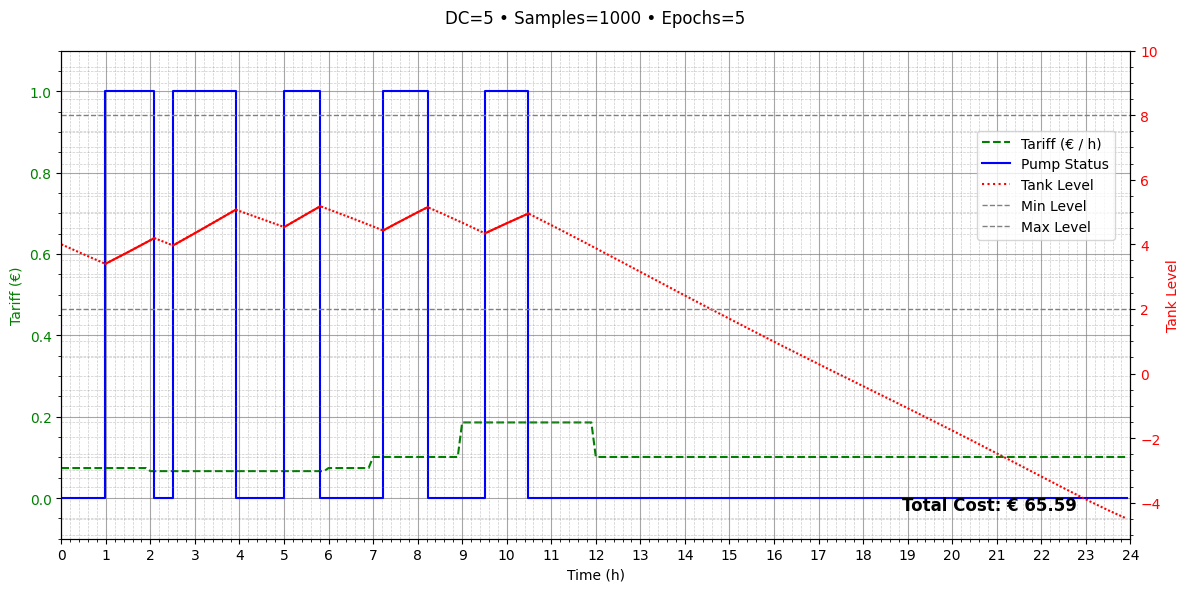

###########################################
Input:  tensor([[ 4.0000,  8.0000, 12.0000, 17.0000, 20.0000,  3.0000,  3.0000,  3.0000,
          2.5000,  2.5000]])
Output:  tensor([[0.9907, 2.5092, 5.0052, 7.2241, 9.5110, 1.0977, 1.4082, 0.8088, 0.9998,
         0.9758]])
Tank levels  tensor([[ 3.3960,  4.1937,  3.9654,  5.0720,  4.5343,  5.1780,  4.4274,  5.1492,
          4.3398,  4.9538, -4.5411]])
Total cost:  tensor(65.5939)
Time taken:  0.0670766830444336 seconds


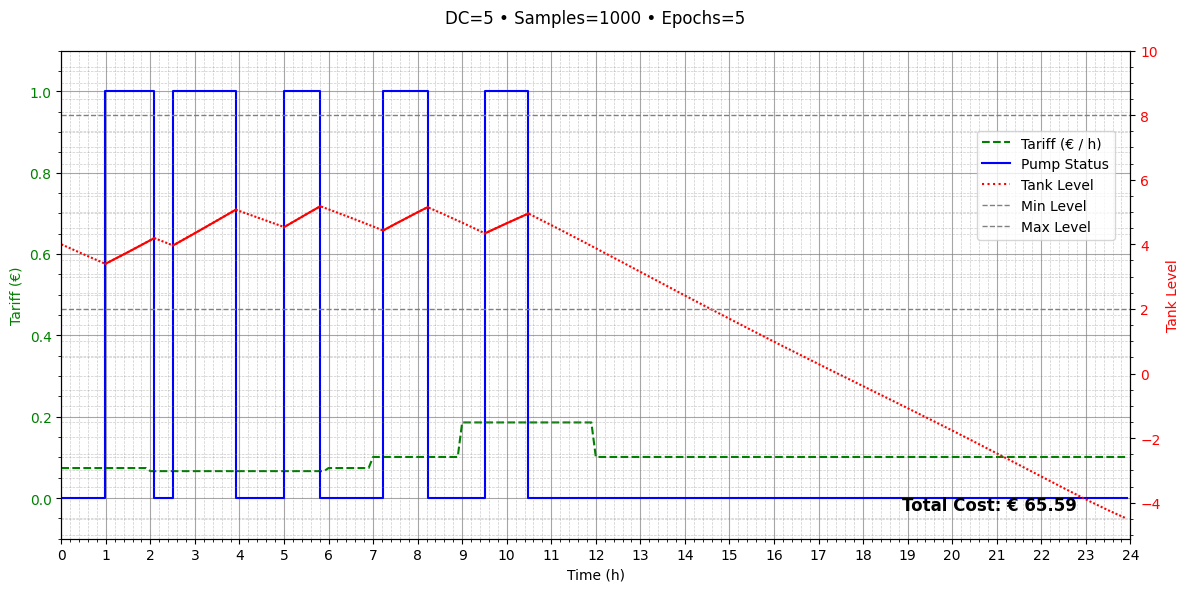

###########################################
Input:  tensor([[ 0.3000,  4.0000, 12.0000, 19.0000, 21.0000,  5.0000,  2.0000,  3.0000,
          2.0000,  1.0000]])
Output:  tensor([[ 0.6811,  5.7148,  8.9198, 13.6262, 15.6148,  4.4093,  0.5044,  0.3526,
          0.2929,  2.7393]])
Tank levels  tensor([[ 3.5827,  6.9474,  6.6340,  7.0261,  5.4765,  5.6692,  2.6304,  2.7426,
          1.5839,  3.2570, -0.6099]])
Total cost:  tensor(90.1513)
Time taken:  0.08501005172729492 seconds


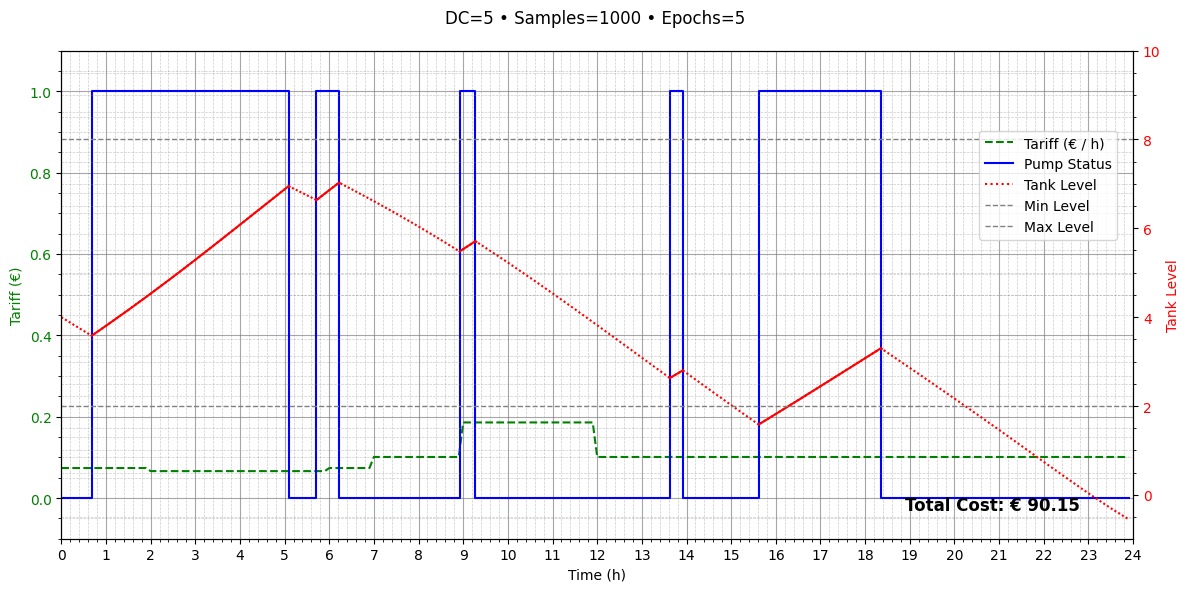

###########################################
Input:  tensor([[ 9.0000, 15.0000, 18.0000, 21.0000, 23.0000,  2.0000,  2.0000,  2.0000,
          1.0000,  0.5000]])
Output:  tensor([[ 0.6954,  1.2504,  3.0245,  7.9357, 10.1820,  0.4706,  0.6817,  1.2695,
          0.1467,  1.2521]])
Tank levels  tensor([[ 3.5741,  3.9038,  3.8549,  4.3499,  3.7655,  4.7770,  2.8615,  2.9658,
          1.6213,  2.3909, -6.4356]])
Total cost:  tensor(53.3739)
Time taken:  0.0763709545135498 seconds


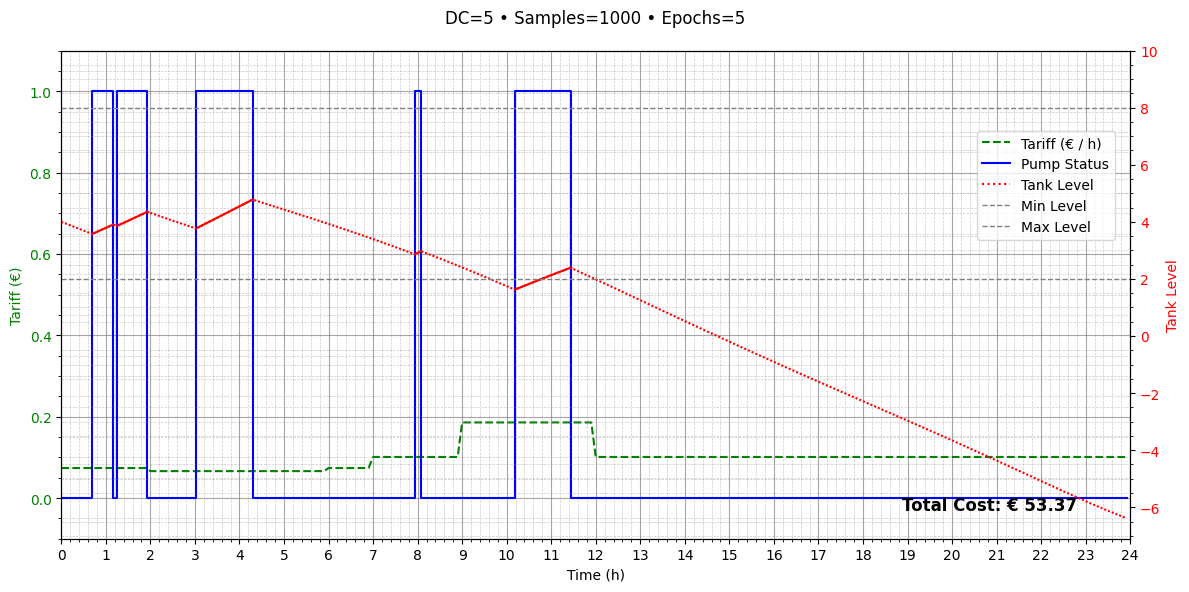

###########################################


In [3]:
import pickle
import numpy as np
import torch
import warnings
from functools import reduce
import matplotlib.pyplot as plt
import torch.nn as nn
import plot_nivel_tanque_new
from method import NNSolver
import os
import plot_nivel_tanque_new as plot_nivel_tanque_new
import utils
import time
import re

torch.xpu.is_available()
warnings.filterwarnings("ignore")
data_path = os.path.join("datasets", "dc_wss", "dc_wss_dataset_dc5_ex1000")

with open(data_path, "rb") as f:
    data = pickle.load(f)
#file_name = "model_2025-06-17_14-56-31_dc5_samples8_epochs50_softWeight100.pt"
file_name = "model_2025-09-15_06-34-21_dc5_samples1000_epochs5.pt"
file_path = os.path.join("models", file_name)

m = re.search(r"_samples(\d+)_epochs(\d+)\.pt$", file_name)
if not m:
    raise ValueError(f"Nome de arquivo não segue o padrão esperado: {file_name}")

samples = int(m.group(1))
epochs = int(m.group(2))

# ############################################################################

args = {
    "probType": "dc_wss",
    "hiddenSize": 200,
    "batchSize": 200,
    "useCompl": False,
    "corrMode": "full",
    "qtySamples": samples,
    "epochs": epochs,
    'dc': 5,
}

newModel = NNSolver(data, args)
newModel.load_state_dict(torch.load(file_path, map_location=torch.device("cpu")))
newModel.eval()
#print(newModel)
############################################################################
# from FontinhaOptimization
#input_data = torch.tensor([[1, 8, 12, 18, 21, 3, 3, 3, 2.5, 2.5]])
# Random
#input_data = torch.tensor([[1, 5, 6, 7, 17, 3, 0.9, 0.9, 5, 4]])


inputs_data = [
    torch.tensor([[1, 8, 12, 18, 21, 0.1, 1, 3, 2.5, 2.5]]),
    torch.tensor([[1, 8, 12, 18, 21, 2, 1, 3, 2.5, 2.5]]),
    torch.tensor([[1, 8, 12, 18, 21, 3, 1, 3, 2.5, 2.5]]),
    torch.tensor([[4, 8, 12, 17, 20, 3, 3, 3, 2.5, 2.5]]), # FONTINHA
    torch.tensor([[4, 8, 12, 17, 20, 3, 3, 3, 2.5, 2.5]]),
    torch.tensor([[0.3, 4, 12, 19, 21, 5, 2, 3, 2, 1]]),
    torch.tensor([[9, 15, 18, 21, 23, 2, 2, 2, 1, 0.5]]),
    
]


#input_data = torch.tensor([[1, 8, 12, 18, 21, 0.1, 1, 3, 2.5, 2.5]])


for i in range(len(inputs_data)):
    time_init = time.time()
    with torch.no_grad():
        
        output_data = newModel(inputs_data[i].to(torch.float32))
    
    #input_data[i] = inputs_data[i].to(torch.float32)



    print("Input: ", inputs_data[i])
    print("Output: ", output_data)

    total_cost = data.obj_fn_Autograd(output_data, args)[0]
    gt = data.gT_Original(output_data)[0].unsqueeze(0)
    print('Tank levels ', gt)
    print("Total cost: ", total_cost)
    time_end = time.time() - time_init
    print("Time taken: ", time_end, "seconds")
    plot_nivel_tanque_new.plot_nivel_tanque_new(args, output_data[0], total_cost, show=True)
    print('###########################################')

#with torch.no_grad():

#    output_data = newModel(input_data)




In [ ]:


##########################################################################

output_data_ = torch.tensor(output_data[0], dtype=torch.float32).unsqueeze(0)  # Adiciona dimensão de batch
total_cost = data.obj_fn_Autograd(output_data_, args)[0]

print("Output: ", output_data_)

print("Total cost: ", total_cost)

# gT espera um batch, então passamos output_data_ duas vezes
gt = data.gT_Autograd(output_data_, args)[0][:-1]
print('gt ', gt)

# Plot
plot_nivel_tanque_new.plot_nivel_tanque_new(args, output_data_[0], total_cost, show=True)






In [ ]:
import data_system
import OptimAuxFunctionsV2 as op
import torch
import matplotlib.pyplot as plt

d = data_system.data_system([5],[0])

example = torch.tensor([ 
                       [   0.0230,     3.5352,    23.7113,    23.8000,    23.8000,     1.2583,
             4.2545,     0.1000,     0.1000,     0.1000]
          
          
          ])


#example = torch.tensor([
    
#    [ 1.024e+00, 4.384e+00, 6.180e+00, 8.372e+00, 1.653e+01, 3.359e+00, 1.795e+00, 8.262e-01 , 4.026e-01, 3.927e+00]
    
#    ])
    
example_ = example.detach().numpy()

tanks, timeInc, pumps = op.level_plot(example_[0], d)

print(len(tanks['tank0_h']))

print(len(timeInc['StartTime']))

In [ ]:
print(example_)

In [ ]:
plt.plot((timeInc['StartTime']/3600), pumps['pump0_s'], label='Tank 0')


In [ ]:
plt.plot((timeInc['StartTime']/3600), tanks['tank0_h'][:-1], label='Tank 0')


In [ ]:
# converte tempo para horas
time_h = timeInc['StartTime'] / 3600

# plota o nível do tanque
plt.plot(time_h, tanks['tank0_h'][:-1], label='Tank 0')

# adiciona linha horizontal em y=2
plt.axhline(y=2, color='gray', linestyle='--', linewidth=1, label='Nível 2')

# adiciona linha horizontal em y=8
plt.axhline(y=8, color='gray', linestyle='--', linewidth=1, label='Nível 8')

plt.xlabel('Tempo (h)')
plt.ylabel('Altura do tanque')
plt.legend()
plt.show()
